In [97]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import datetime

In [2]:
from fred_tools import api_key, fetch_fred_data

In [216]:
series_dict = {
              'OIL_Prod':{'series_id':'IPG211111CS','data_type':'index'},
              'OIL_Price':{'series_id':'DCOILWTICO','data_type':'raw'},
              'Vehicle_miles':{'series_id':'M12MTVUSM227NFWA','data_type':'raw'},
              'OIL_caputil':{'series_id':'CAPUTLG211S','data_type':'percent'}
}

additional_params = {'frequency':'m','aggregation_method':'avg'}

In [218]:
all_data = pd.DataFrame()
for series in series_dict.keys():
    series_data = fetch_fred_data(api_key=api_key, series_id=series_dict[series]['series_id'],
                                  additional_params=additional_params
                                 ).rename(columns={'value':series})
    if all_data.shape[0] == 0:
        all_data = series_data
    else:
        all_data = all_data.merge(series_data[['date',series]], on='date')

In [219]:
# Modify feature data types
all_data['date'] = pd.to_datetime(all_data['date'])
all_data[list(series_ids.keys())] = all_data[list(series_ids.keys())].astype(float)
all_data['year'] = all_data['date'].apply(lambda x: x.year)

# Index raw value features
index_year = 2012
for series, series_detalis in series_dict.items():
    if series_detalis['data_type']=='raw':
        all_data[series + '_index'] = all_data[series]/all_data.groupby('year').mean().loc[index_year,series]*100

In [221]:
# Establish Index
all_data.set_index('date', inplace=True)

In [222]:
sns.set_style('whitegrid')
sns.set_context('paper')

series_list = ['OIL_Prod','OIL_Price_index','Vehicle_miles_index','OIL_caputil']

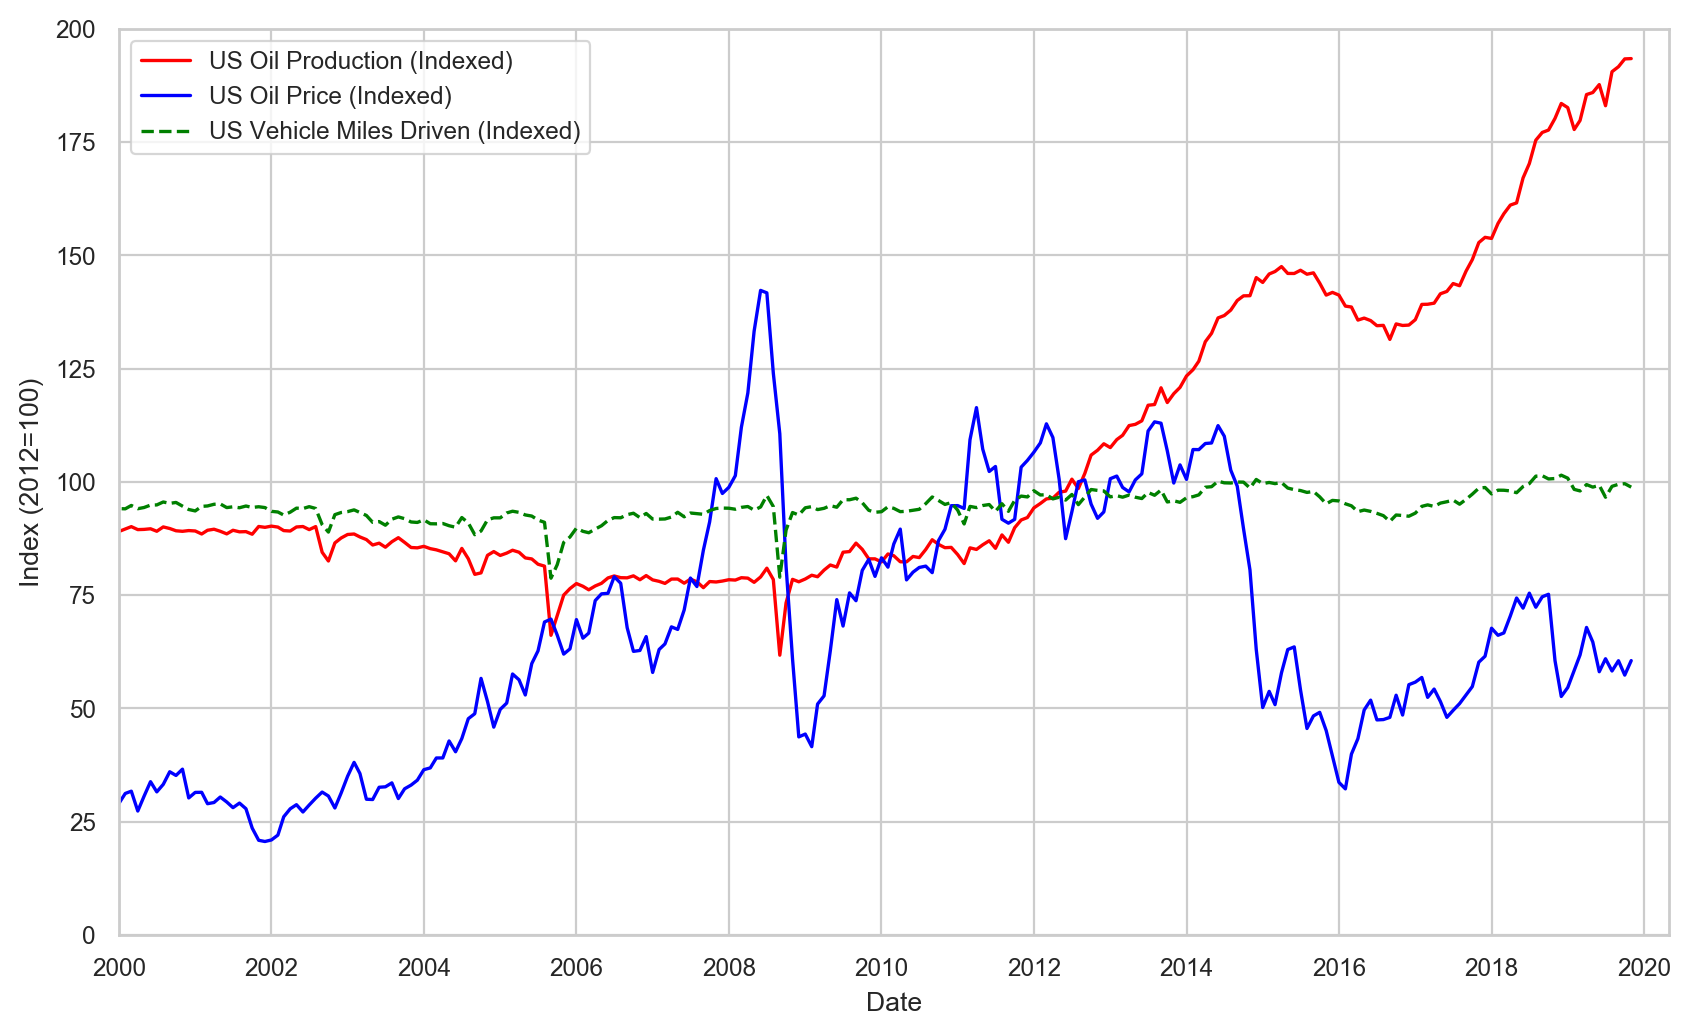

In [224]:
annotate = False

fig, ax = plt.subplots(figsize=(10,6), dpi=200)
ax.plot(all_data.index, all_data['OIL_Prod'], color='red', label='US Oil Production (Indexed)')
ax.plot(all_data.index, all_data['OIL_Price_index'], color='blue', label='US Oil Price (Indexed)')
ax.plot(all_data.index, all_data['OIL_caputil'], ls='--', color='green', label='US Vehicle Miles Driven (Indexed)')
ax.legend(loc='best')

ax.set_ylabel('Index (2012=100)')
ax.set_xlabel('Date')

## Annotations
if annotate:
    ax.text(x='2016-12-01' ,y=180 ,s='Trump Inauguration', horizontalalignment='right')
    ax.axvline(x='2017-01-01', ls='--', color='black', lw=1)
    for series in series_list:
        #Innaguration
        ax.scatter(x=['2017-01-01'], y=[all_data.loc['2017-01-01',series]],color='black',alpha=1)
        # Current
        ax.scatter(x=[all_data.index[-1]], y=[all_data.loc[all_data.index[-1],series]],color='black',alpha=1)

ax.set_ylim(0,200)
ax.set_xlim('2000-01-01',all_data.index[-1] + datetime.timedelta(days=180));